**Deutsch-Jozsa Algorithm**

In [31]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [32]:
import random

# randomly determine whether constant or balanced (feel free to specify manually)
oracle_type = random.choice(['constant', 'balanced'])
oracle_type

'constant'

In [33]:
n = 3
circuit = QuantumCircuit(n+1, n)

# apply hadamard to all qubits
circuit.h(range(n))
circuit.h(n) # for oracle output qubit

if oracle_type == 'balanced':

    # define a balanced oracle
    for q in range(n):
        circuit.cx(q, n)

else:

    out = random.choice([0, 1])

    if out == 1:
        circuit.x(n) # flip oracle qubit

# apply hadamard to all qubits
circuit.h(range(n))

circuit.measure(range(n), range(n))

circuit.draw()

┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ H ├┤ X ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2

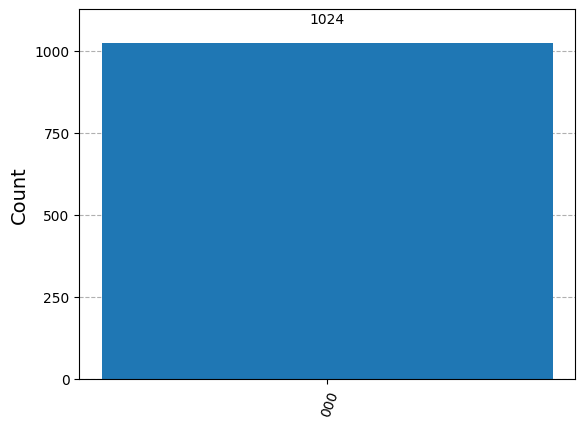

In [34]:
simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)